In [1]:
library(Seurat)
library(Signac)

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [ ]:
## filtering integrated object

## 32k cells -> 14k cells

# manually annotated each celltype and collisions using heatmaps, also annotated what i think are collisions
# removing nFeatures and nCounts top 10% and > 500
# removing doubletfinder called doublets
# removing collisions

#sobj_nodoub_filt <- subset(sobj_nodoub, nCount_RNA > 500
#                     & nFeature_RNA > 500 
#                     & nFeature_RNA < 4000 #90% quantile across previously annotated celltypes
#                     & nCount_RNA < 7000 #90% quantile
                     )

# sobj_nodoub <- subset(sobj, subset = DF.classifications == "Singlet")

#sobj_nodoub_filt_nocol <- subset(sobj_nodoub_filt, celltype %in% c("Epi_Endo_Collision", "Immune_Endo_Collision",
#                                                 "Mesen_Endo_Collision", "Mesen_Endo_Immune_Collision"),
#                                 invert =  T
                     )


In [49]:
sobj <- readRDS('/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/05_paired_tag_integ/231208_lung_pt_integ_labtrans_df.RDS')

In [50]:
colnames(sobj@meta.data)

[1] "orig.ident"                               
 [2] "nCount_RNA"                               
 [3] "nFeature_RNA"                             
 [4] "percent.mt"                               
 [5] "nCount_H3K27me3"                          
 [6] "nFeature_H3K27me3"                        
 [7] "library_rna_atac_id"                      
 [8] "RNA_snn_res.0.5"                          
 [9] "seurat_clusters"                          
[10] "nCount_H3K27ac"                           
[11] "nFeature_H3K27ac"                         
[12] "integrated_snn_res.0.5"                   
[13] "predicted.id"                             
[14] "prediction.score.unclassified"            
[15] "prediction.score.vascular.smooth.muscle"  
[16] "prediction.score.alveolar.developmental"  
[17] "prediction.score.ciliated"                
[18] "prediction.score.myofibroblast"           
[19] "prediction.score.fibroblast"              
[20] "prediction.score.endothelium"             
[21] "prediction.score.alveolar.type.1"         
[22] "prediction.score.alveolar.type.2"         
[23] "prediction.score.macrophage"              
[24] "prediction.score.pulmonary.neuroendocrine"
[25] "prediction.score.airway.smooth.muscle"    
[26] "prediction.score.NK.T.cell"               
[27] "prediction.score.B.cell"                  
[28] "prediction.score.max"                     
[29] "DF.classifications"

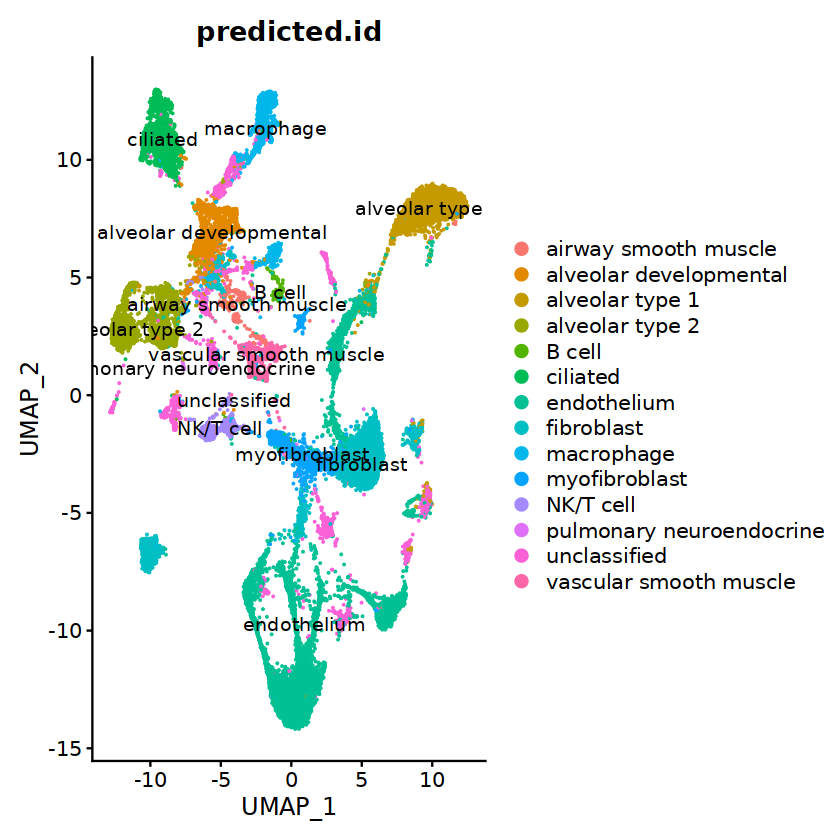

In [13]:
DimPlot(sobj, reduction = "integrated.umap", group.by = "predicted.id", label = T)

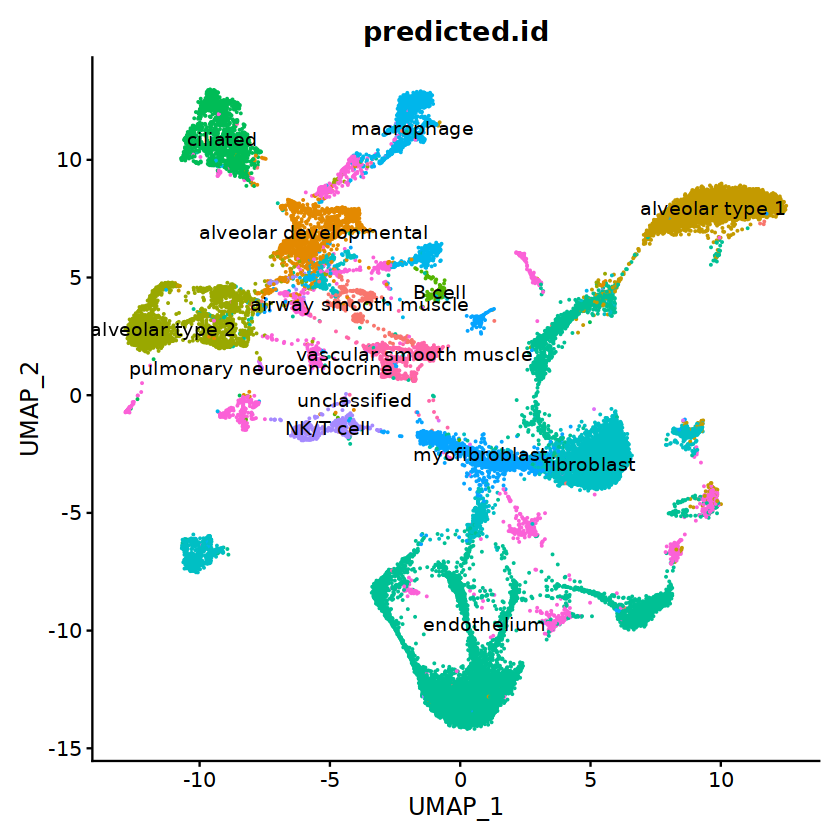

In [46]:
DimPlot(sobj, reduction = "integrated.umap", group.by = "predicted.id", label = T) + NoLegend()

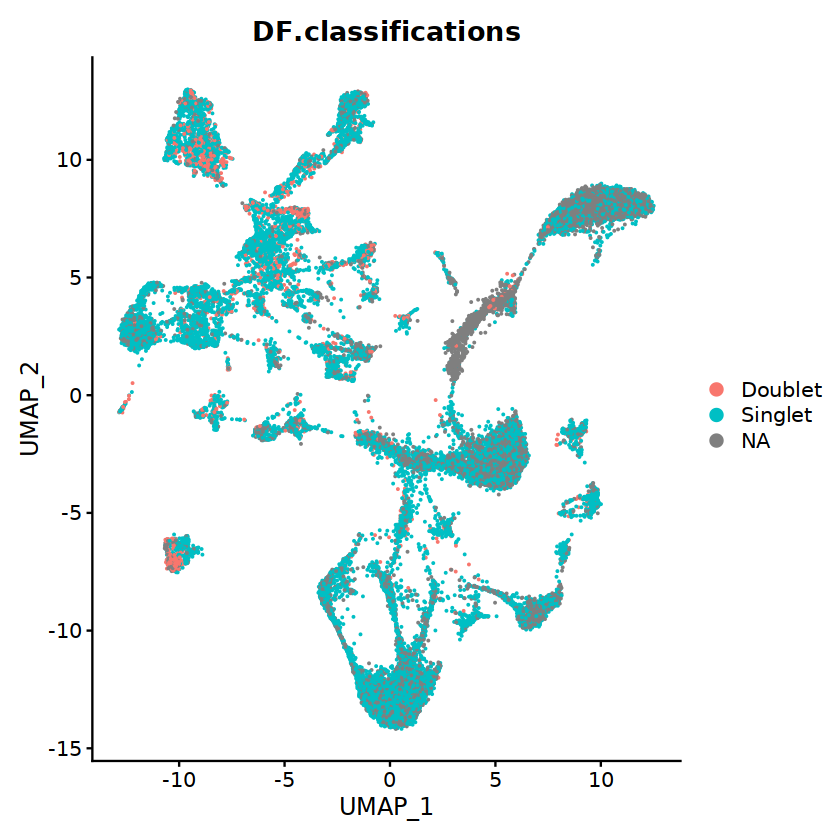

In [51]:
DimPlot(sobj , group.by ="DF.classifications" )

[1] 2258

[1] 0.0691874

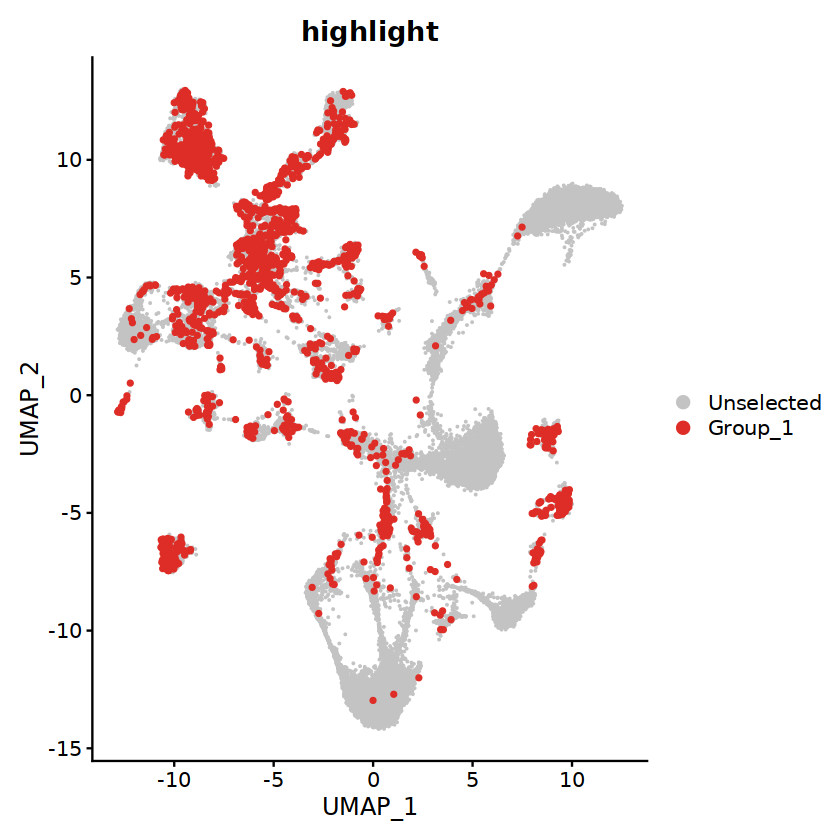

In [52]:
Idents(sobj) <- 'DF.classifications'
db_cells <- WhichCells(sobj, idents = "Doublet" )
length(db_cells) 
length(db_cells) / length(colnames(sobj))
DimPlot(sobj , group.by ="DF.classifications", cells.highlight = db_cells  )

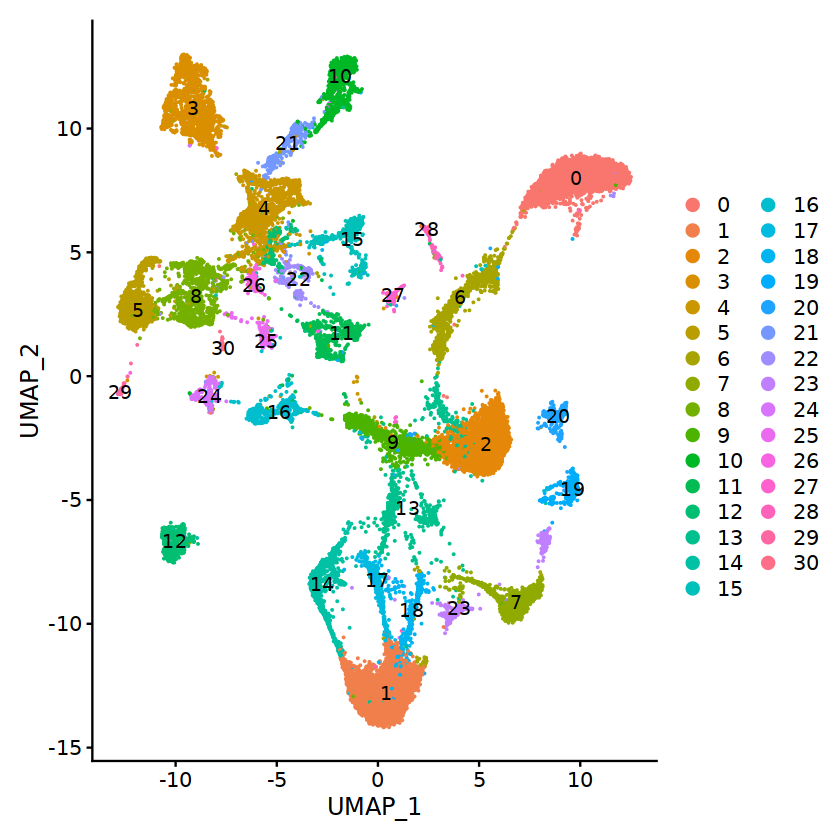

In [4]:
DimPlot(sobj, reduction = "integrated.umap", label = T)

In [ ]:
# vascular, airway, ciliated

DimPlot(sobj, reduction = "integrated.umap", label = T)

ASMC	DES
ASMC	LGR6
VSMC	CNN1
VSMC	NTRK3
VSMC	ITGA7


Ciliated	FOXJ1
Ciliated	RSPH1
Ciliated	CDHR3
Ciliated	CDHR4

In [ ]:
Deuterosomal	DEUP1
Deuterosomal	FOXN4
Deuterosomal	CDC20B

Secretory	SCGB1A1
Secretory	SCUBE2
Secretory	BPIFB1
Secretory	LCN2
Secretory	TSPAN8
RAS	SCGB3A2
RAS	KLK11
RAS	MGP
RAS	SOX4
Goblet	MUC5AC
Goblet	SPDEF
Goblet	PCDH7
Goblet	SLC4A11
Goblet	AGR2
Mucous	MUC5B
Mucous	SPDEF
Mucous	BPIFB2
Mucous	MUC5AC
Serous	LYZ
Serous	LTF
Serous	LPO

In [ ]:
# secretory within cluster 6 lcn2, bpifb1
# ras in cluster 6 with markers scgb3a2, sox4
# mucous top of 4 maybe

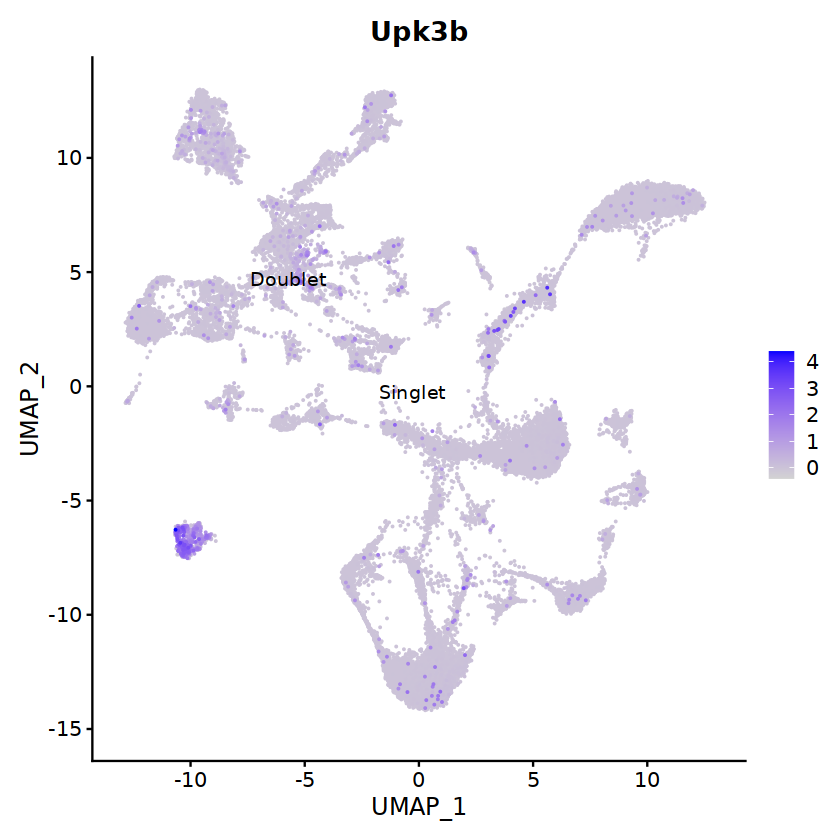

In [55]:
FeaturePlot(sobj, features = c("Upk3b"), reduction = "integrated.umap", , order = T, label = T)

# 


# 

In [ ]:
# cluster 7 doesnt have anything except endo markers
# cluster 8 has epi, endo, and mesen overall markers

# higher digit clusters that could be doublets
# 13, mesen and endo collision based on overall compt markers
# 15 (15 even though theres bcell markers),
# 19, 20, 23 (19 20 and 23 poten epi and endo collisions since AT1 and fibroblast markers present)
# 24 unsure of markers, has epi, immune and mesen overall markers, probs epi endo collision mostly from htmap
# 25 might be an endo immune collision based on overall compt markers
# 26 might be an epi endo collision based on overall compt markers
# 27 might be an mesen endo collision based on overall compt markers
# 28 mostly in endo, but doesnt really overlap other compt, based on htmap has some AT1 exp
# 29 mostly in endo, but doesnt really overlap other compt, based on htmap has some AT1 exp


In [60]:
sobj

An object of class Seurat 
124150 features across 32636 samples within 4 assays 
Active assay: integrated (2000 features, 2000 variable features)
 3 other assays present: RNA, H3K27me3, H3K27ac
 2 dimensional reductions calculated: pca, integrated.umap

In [56]:
sobj_nodoub <- subset(sobj, subset = DF.classifications == "Singlet")

In [58]:
sobj_nodoub 

An object of class Seurat 
124150 features across 21999 samples within 4 assays 
Active assay: integrated (2000 features, 2000 variable features)
 3 other assays present: RNA, H3K27me3, H3K27ac
 2 dimensional reductions calculated: pca, integrated.umap

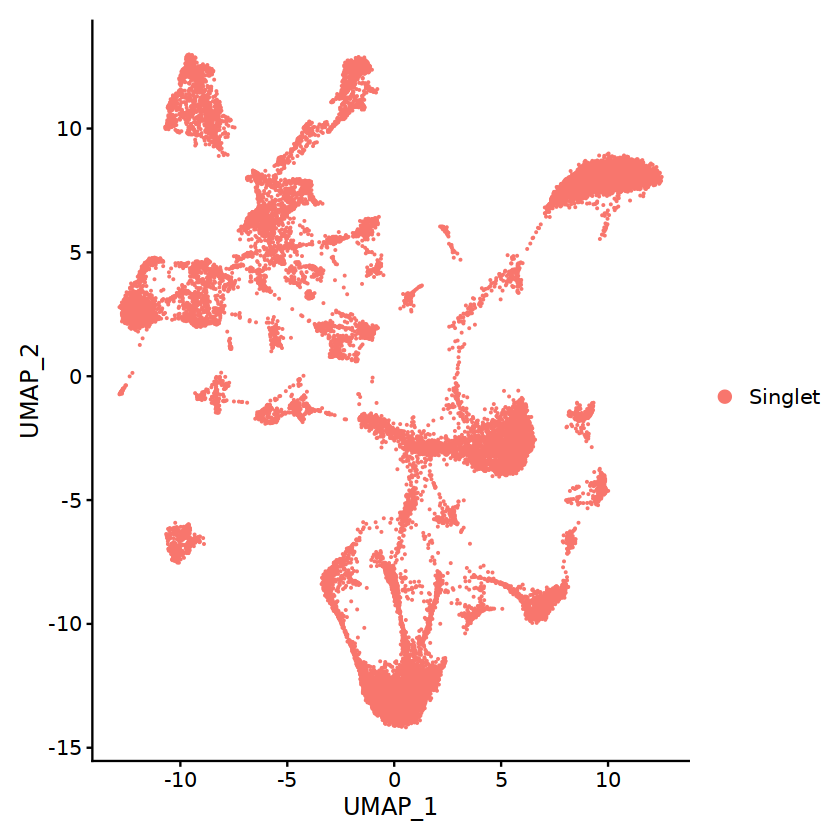

In [57]:
DimPlot(sobj_nodoub)

In [125]:
library(dplyr)
assignment <- sobj_nodoub$seurat_clusters
celltype_manual_anno <- case_when(


    assignment == 0 ~ "AT1",
    assignment == 1 ~ "Endothelium",
    assignment == 2 ~ "Fibroblasts",
    assignment == 3 ~ "Ciliated",
    
    assignment == 4 ~ "AT2", #?
    
    assignment == 5 ~ "AT2",
    assignment == 6 ~ "AT2", #? 
   
    assignment == 7 ~ "Endothelium", #?,
    assignment == 8 ~ "AT2",
    assignment == 9 ~ "Fibroblasts",
    
    assignment == 10 ~ "Macrophages",
    assignment == 11 ~ "Pericytes",
   
    assignment == 12 ~ "Mesothelial",
    assignment == 13 ~ "Mesen_Endo_Collision",

    assignment == 14 ~ "Endothelium", 
    
    assignment == 15 ~ "BCell",
    assignment == 16 ~ "TCell", 
   
    assignment == 17 ~ "Endothelium" ,
    assignment == 18 ~ "Endothelium",
    
    assignment == 19 ~ "Epi_Endo_Collision",
    assignment == 20 ~ "Epi_Endo_Collision", 
   
    assignment == 21 ~ "Macrophages",
    assignment == 22 ~ "Smooth Muscle",

    assignment == 23 ~ "Epi_Endo_Collision", 
    
    assignment == 24 ~ "Epi_Endo_Collision",
    assignment == 25 ~ "Immune_Endo_Collision", 
   
    assignment == 26 ~ "Epi_Endo_Collision", 
    assignment == 27 ~ "Mesen_Endo_Collision",

    assignment == 28 ~ "Epi_Endo_Collision" ,
    assignment == 29 ~ "Epi_Endo_Collision",
    assignment == 30 ~ "PNEC"
    
)

In [126]:
sobj_nodoub$celltype <- celltype_manual_anno


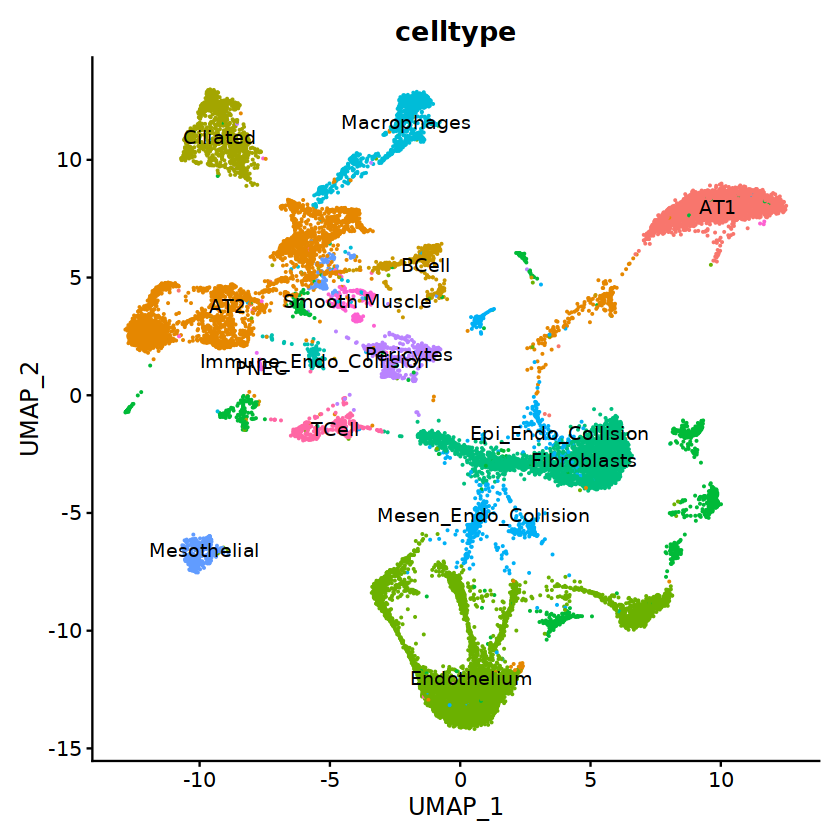

In [127]:
DimPlot(sobj_nodoub, group.by = "celltype", label = T) + NoLegend()

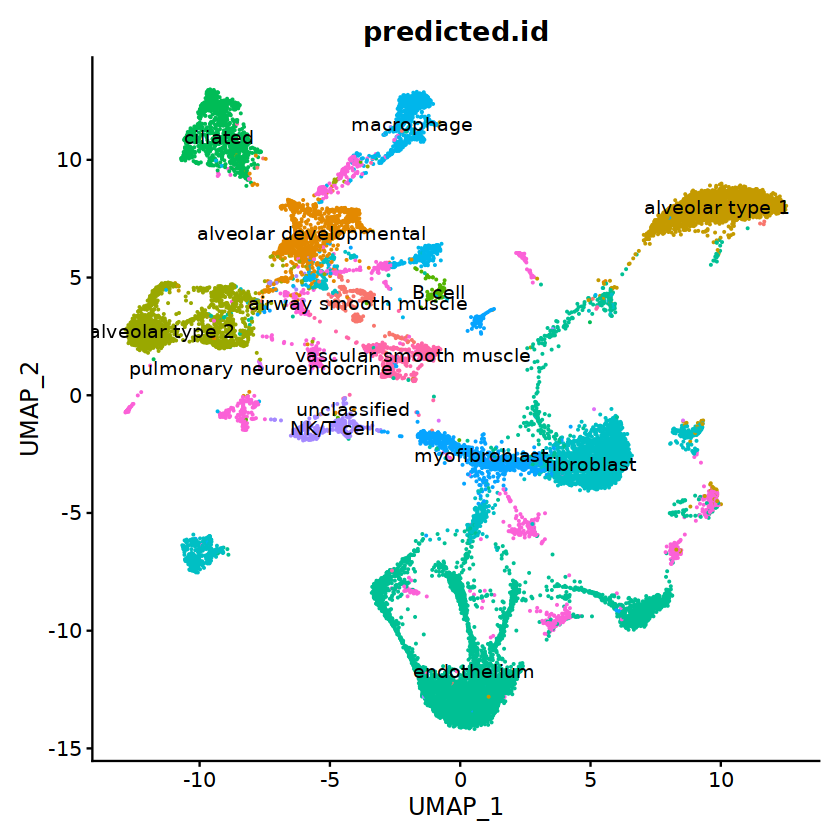

In [128]:
DimPlot(sobj_nodoub, group.by = "predicted.id", label = T) + NoLegend()

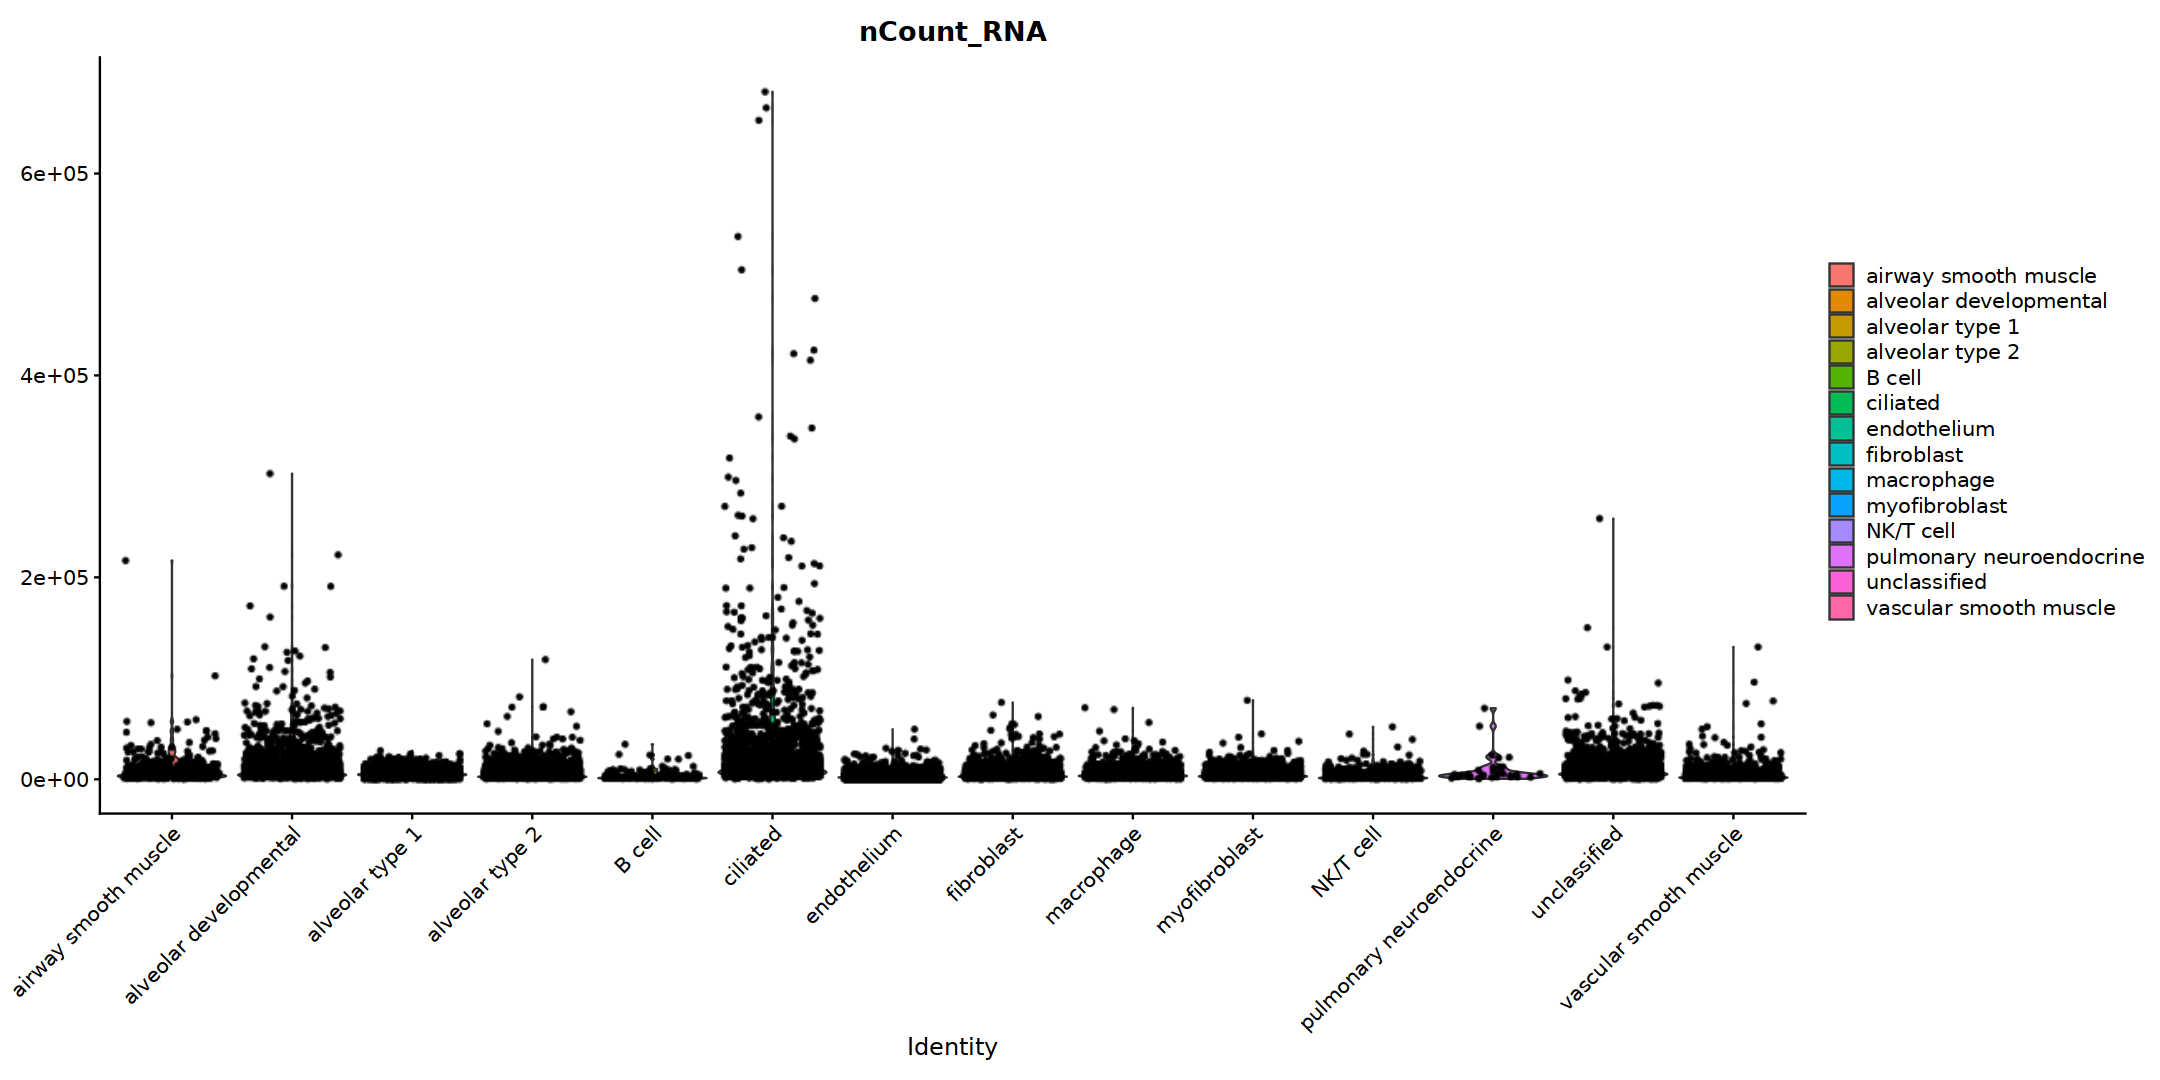

In [144]:
library(repr)
options(repr.plot.width=18, repr.plot.height=9)

VlnPlot(sobj, "nCount_RNA", group.by = "predicted.id")


In [152]:
quantile(sobj$nCount_RNA, c(0.1, 0.9)) #maybe set to 6000

10%     90% 
 1367.0 12406.5

In [146]:
quantile(sobj$nCount_RNA) #maybe set to 6000

0%       25%       50%       75%      100% 
   104.00   2096.00   3660.00   6871.75 680996.00

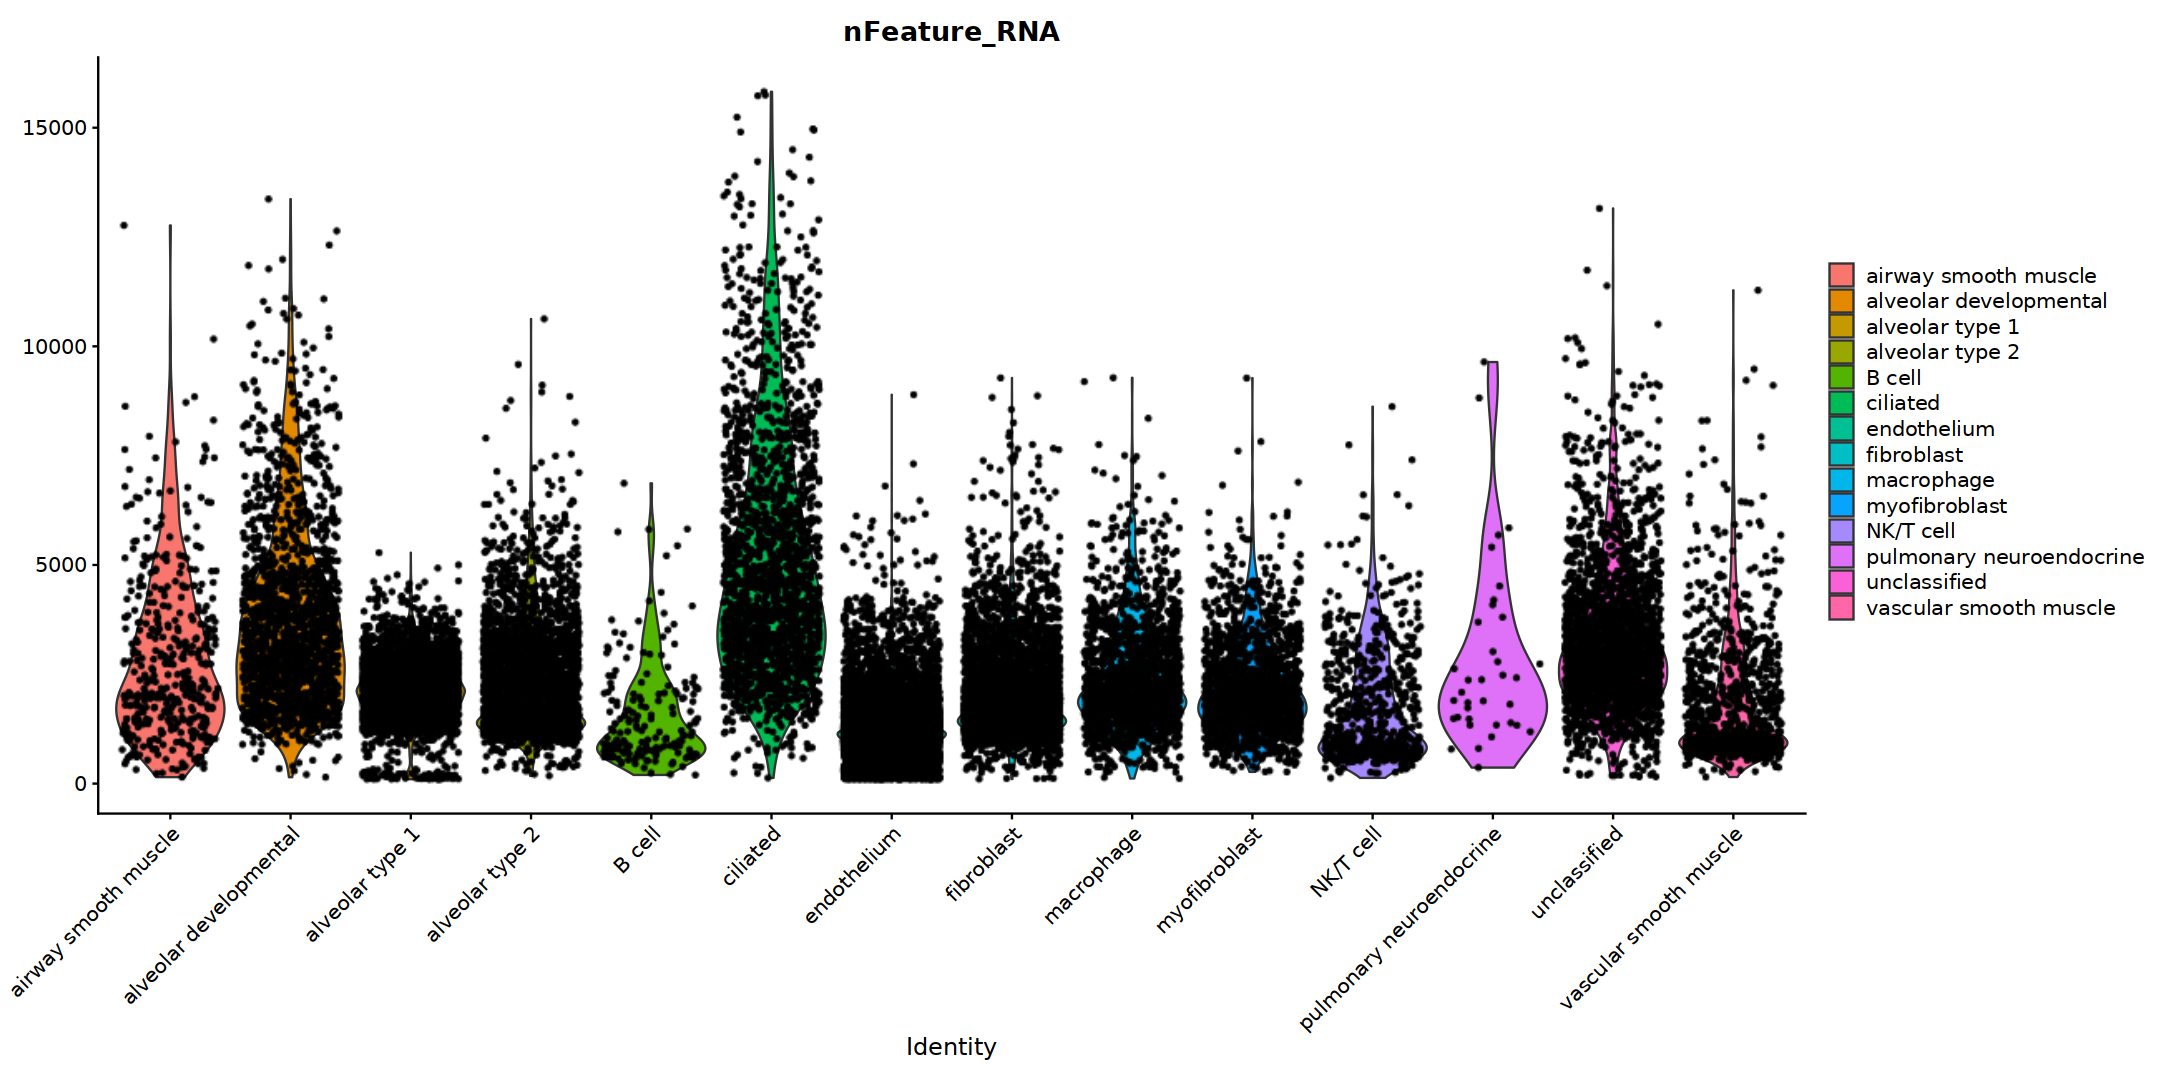

In [147]:
VlnPlot(sobj, "nFeature_RNA", group.by = "predicted.id")

In [148]:
quantile(sobj$nFeature_RNA) #maybe set to 5000

0%      25%      50%      75%     100% 
  101.00  1220.00  1805.00  2729.25 15822.00

In [151]:
quantile(sobj$nFeature_RNA, c(0.1, 0.9)) #maybe set to 6000

10%    90% 
 888.0 4055.5

In [129]:
sobj_nodoub_filt <- subset(sobj_nodoub, nCount_RNA > 500
                     & nFeature_RNA > 500 
                     & nFeature_RNA < 4000 #90% quantile across previously annotated celltypes
                     & nCount_RNA < 7000 #90% quantile
                     )


In [130]:
sobj_nodoub_filt

An object of class Seurat 
124150 features across 16123 samples within 4 assays 
Active assay: integrated (2000 features, 2000 variable features)
 3 other assays present: RNA, H3K27me3, H3K27ac
 2 dimensional reductions calculated: pca, integrated.umap

In [133]:
sobj

An object of class Seurat 
124150 features across 32636 samples within 4 assays 
Active assay: integrated (2000 features, 2000 variable features)
 3 other assays present: RNA, H3K27me3, H3K27ac
 2 dimensional reductions calculated: pca, integrated.umap

In [131]:
DefaultAssay(sobj_nodoub_filt) <- "integrated"

sobj_nodoub_filt <- ScaleData(sobj_nodoub_filt, verbose = FALSE)
sobj_nodoub_filt <- RunPCA(sobj_nodoub_filt, npcs = 30, verbose = FALSE)
sobj_nodoub_filt <- RunUMAP(sobj_nodoub_filt, reduction = "pca", dims = 1:30, reduction.name = "integrated.umap", verbose = F)

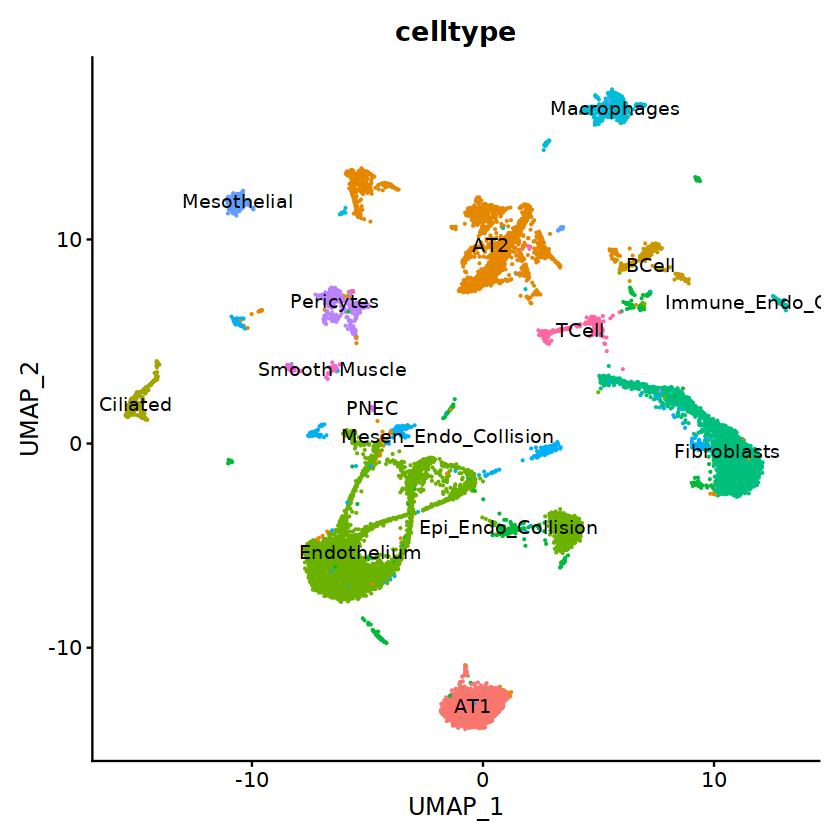

In [132]:
DimPlot(sobj_nodoub_filt, group.by = "celltype", label = T) + NoLegend()

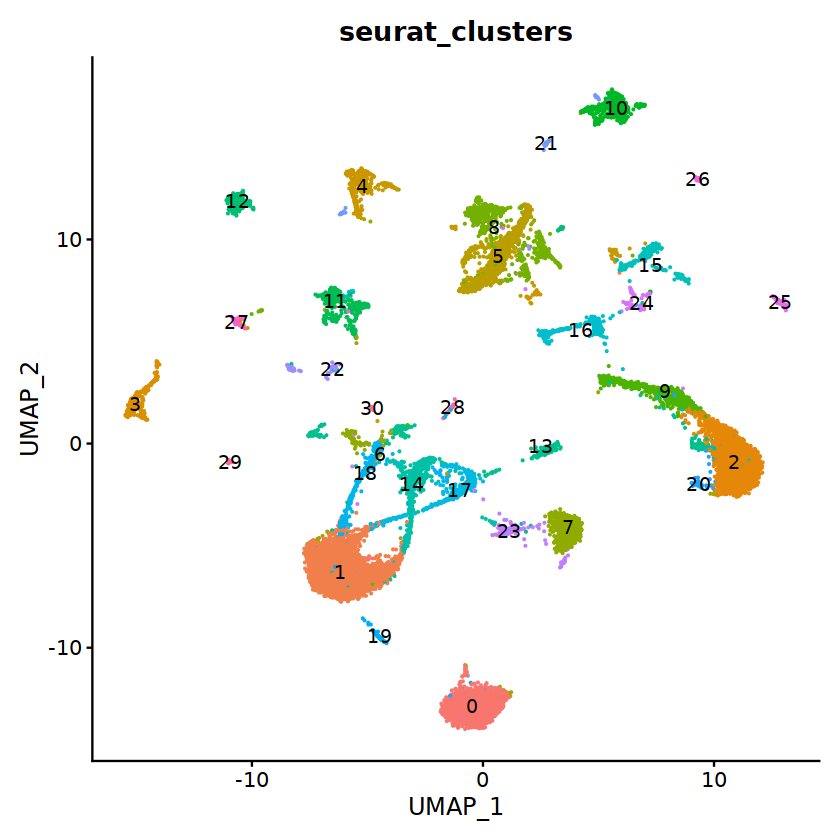

In [124]:
# still weird, 4, 7, 23
DimPlot(sobj_nodoub_filt, group.by = "seurat_clusters", label = T) + NoLegend()

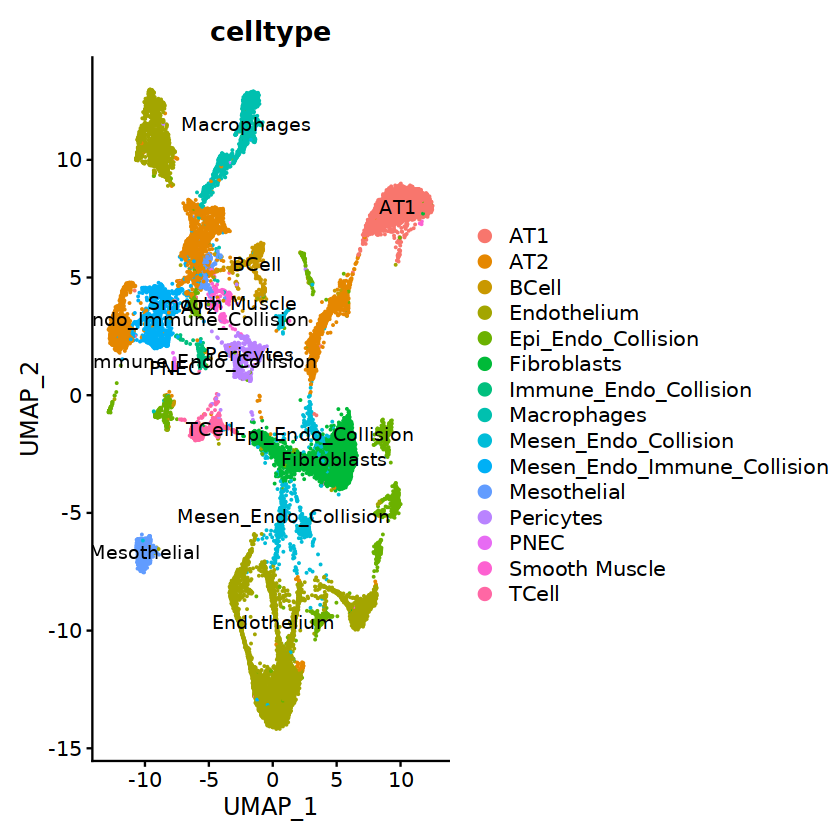

In [137]:
DimPlot(sobj, group.by = "celltype", label = T) 

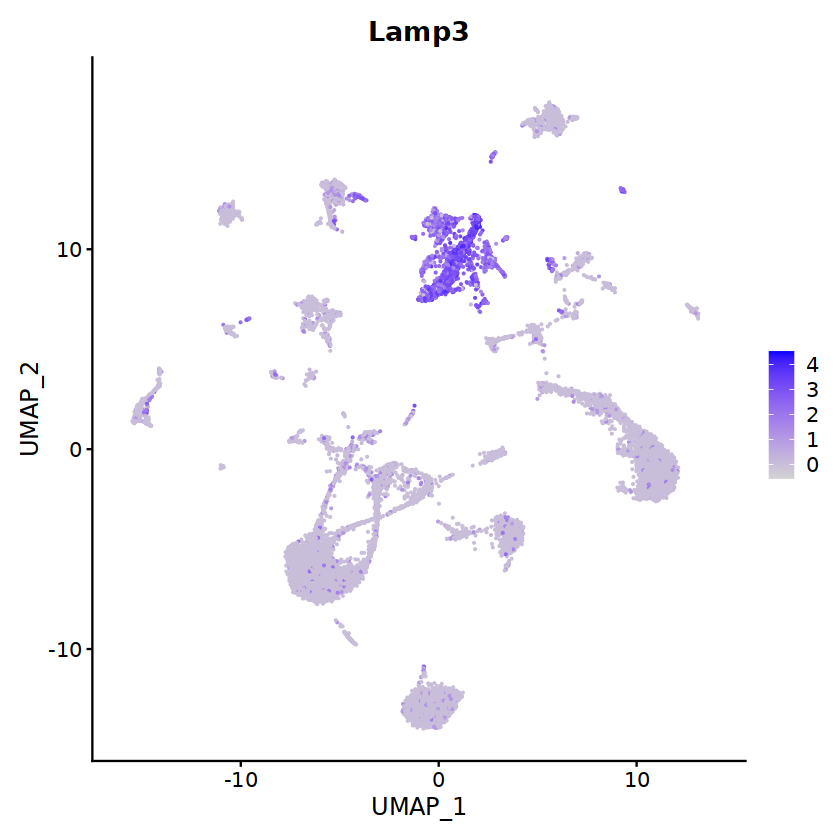

In [106]:
FeaturePlot(sobj_nodoub_filt, features = c("Lamp3"))


In [139]:
sobj_nodoub_filt_nocol <- subset(sobj_nodoub_filt, celltype %in% c("Epi_Endo_Collision", "Immune_Endo_Collision",
                                                 "Mesen_Endo_Collision", "Mesen_Endo_Immune_Collision"),
                                 invert =  T
                     )


In [143]:
sobj_nodoub_filt_nocol

An object of class Seurat 
124150 features across 14956 samples within 4 assays 
Active assay: integrated (2000 features, 2000 variable features)
 3 other assays present: RNA, H3K27me3, H3K27ac
 2 dimensional reductions calculated: pca, integrated.umap

In [142]:
sobj

An object of class Seurat 
124150 features across 32636 samples within 4 assays 
Active assay: integrated (2000 features, 2000 variable features)
 3 other assays present: RNA, H3K27me3, H3K27ac
 2 dimensional reductions calculated: pca, integrated.umap

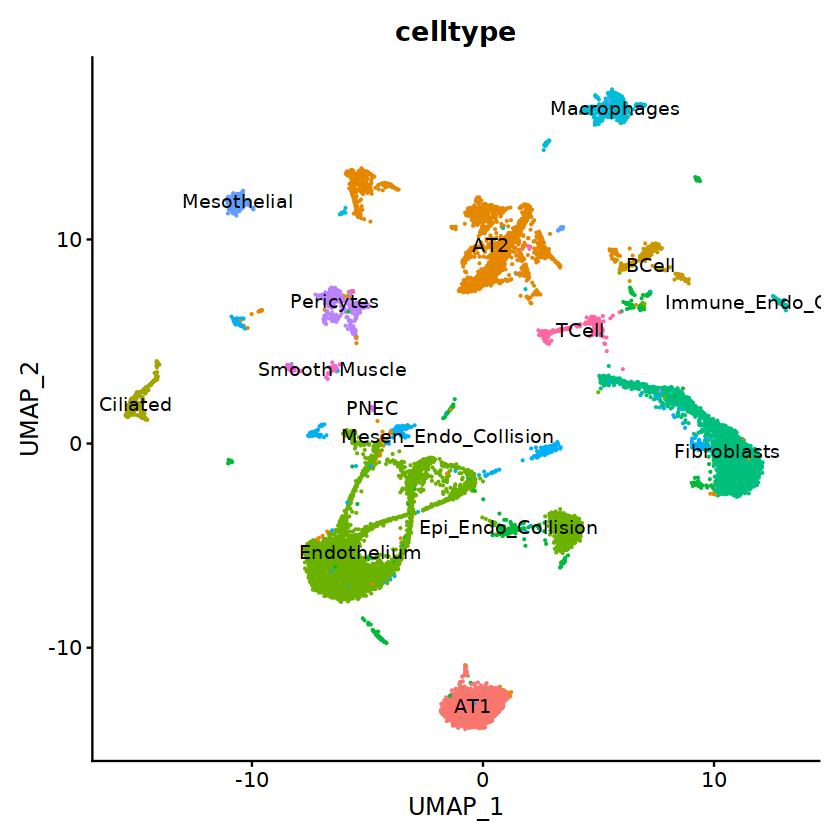

In [140]:
DimPlot(sobj_nodoub_filt, group.by = "celltype", label = T) + NoLegend()

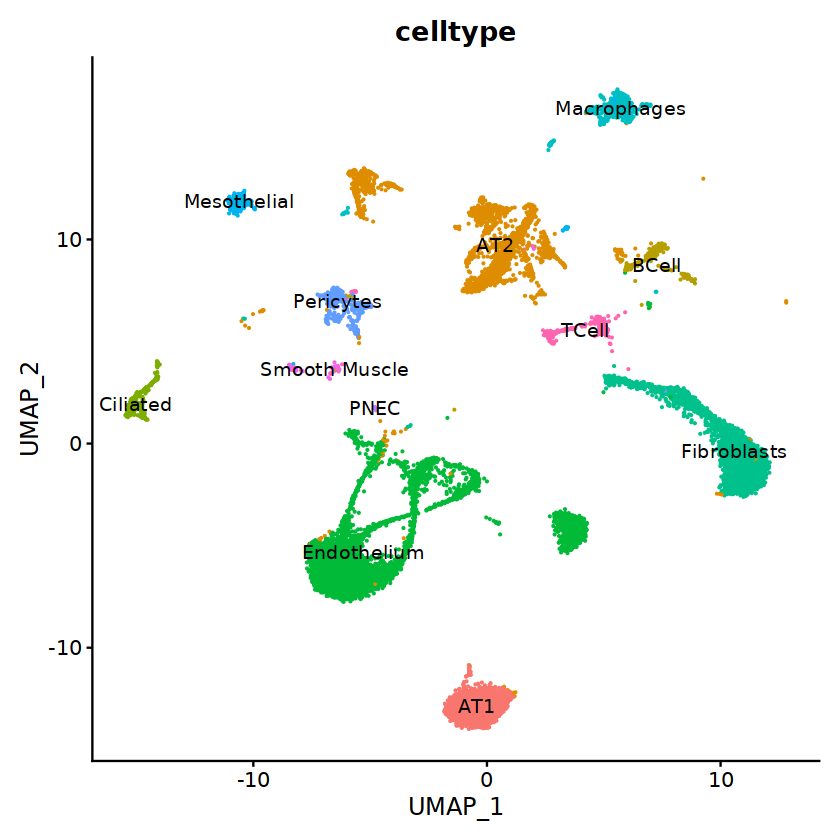

In [141]:
DimPlot(sobj_nodoub_filt_nocol, group.by = "celltype", label = T) + NoLegend()

In [168]:
# save with more stringent filter for nCount and nFeature
# removing collisions

saveRDS(sobj_nodoub_filt_nocol, 
        '/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/05_paired_tag_integ/231208_02_lung_pt_integ_anno_filt.RDS')

In [ ]:
# 19, 20 and overlap in endo and epi markers

In [ ]:
AT1 - 0, 19, 20, top part of cluster 23 
AT2 - bottom part of 3, part of 4, cluster 5,lightly in 6,  lightly in 16, part of 22, part of 26
BCell - bottom part of 15 for sure
NK - left part of 16 for sure
PNEC - 30 for sure, scattered across 11
TC markers not sure
ASMC top half of 22
Arteries / veins - mostly 17 and 14, very tiny bit left side of 19
basal - very small subset of 4 but probs not
capillary - mostly 1, 18, 23, left side of 19
cartilage nothing
ciliated - bottom of 6, moderately in 3 (actually mostly three)
club cells - tip top of 4, bottom left of 3, unsure
fibroblast - 2,9 , small clusters 13 and 20 probs doubs
fibromocyte - 22
lymphatics - 14 , 17
macrophages - 10 , unclean in 21, unclean in 15
matrix fibroblasts 1 - right side of 2 for sure
matrix fibroblasts 2 - left side of 9 for sure
mesothelial - 12 for sure
myofibroblasts - have some in 20, top of 8
pericytes - cluster 11
smooth muscle - cluster 22

In [154]:
sobj_nodoub_filt

An object of class Seurat 
124150 features across 16123 samples within 4 assays 
Active assay: integrated (2000 features, 2000 variable features)
 3 other assays present: RNA, H3K27me3, H3K27ac
 2 dimensional reductions calculated: pca, integrated.umap

In [163]:
DefaultAssay(sobj_nodoub_filt) <- 'H3K27ac'

In [164]:
Idents(sobj_nodoub_filt) <- 'celltype'

In [166]:
sobj_nodoub_filt[['H3K27me3']]

ChromatinAssay data with 23296 features for 16123 cells
Variable features: 0 
Genome: 
Annotation present: TRUE 
Motifs present: FALSE 
Fragment files: 1 

In [167]:
sobj_nodoub_filt[['H3K27ac']]

Assay data with 71449 features for 16123 cells
First 10 features:
 chr1-3514511-3515425, chr1-3670705-3671174, chr1-3671301-3672079,
chr1-3913364-3914223, chr1-4408825-4409545, chr1-4412196-4413074,
chr1-4456478-4457389, chr1-4471192-4471869, chr1-4489814-4490155,
chr1-4490261-4490799 

In [165]:
# ac

# at1 and at2 regulator
# cepb -> at2
# tead1 -> at1
# 0 and 2 doesn't have much 
CoveragePlot(sobj_nodoub_filt, region = "Nkx2-1", annotation = T, window = 2000, peaks = F, 
             extend.upstream = 20000, extend.downstream = 20000) # chr3 3508030-3508332 # chr3-3508030-3508332

ERROR: Error in SingleCoveragePlot(object = object, region = region, annotation = annotation, : Requested assay is not a ChromatinAssay.


In [ ]:
# at1 and at2 regulator
# cepb -> at2
# tead1 -> at1
# 0 and 2 doesn't have much 
CoveragePlot(filt_H3K27me3, region = "Nkx2-1", annotation = T, window = 2000, peaks = F, 
             extend.upstream = 15000, extend.downstream = 5000) # chr3 3508030-3508332 # chr3-3508030-3508332
# old params 20000, extend.downstream = 20000

In [ ]:
DefaultAssay(sobj_nodoub_filt) <- 'H3K27ac'

In [ ]:
Idents(sobj_nodoub_filt) <- 'celltype'